In [1]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x +np.random.randn(100, 1)

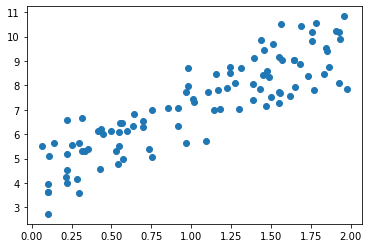

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [3]:
x_b = np.c_[np.ones((100, 1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [4]:
theta_best

array([[4.30599003],
       [2.7831693 ]])

In [5]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.30599003],
       [9.87232864]])

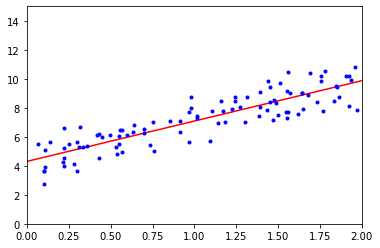

In [6]:
plt.plot(x_new, y_predict, 'r-')
plt.plot(x, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.30599003]), array([[2.7831693]]))

In [8]:
lin_reg.predict(x_new)

array([[4.30599003],
       [9.87232864]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[4.30599003],
       [2.7831693 ]])

In [10]:
np.linalg.pinv(x_b).dot(y)

array([[4.30599003],
       [2.7831693 ]])

In [11]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iterations in range(n_iterations):
    gradients = 2 / m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - eta * gradients
    
theta

array([[4.30599003],
       [2.7831693 ]])

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.30721368],
       [2.80045075]])

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_res = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_res.fit(x,y.ravel())
sgd_res.intercept_, sgd_res.coef_

(array([4.34377047]), array([2.8346824]))

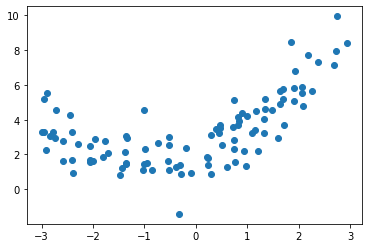

In [37]:
m = 100
x = None
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)
plt.show()

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.49940852])

In [39]:
X_poly[0]

array([0.49940852, 0.24940887])

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.03772462]), array([[0.91331904, 0.5006373 ]]))

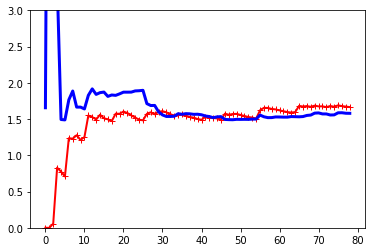

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curvers(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    
lin_reg = LinearRegression()
plot_learning_curvers(lin_reg, X, y)
plt.ylim(0,3)
plt.show()

1


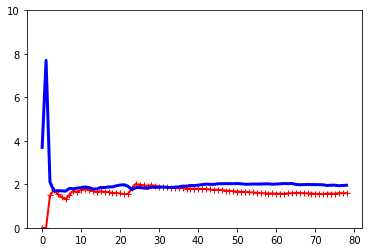

11


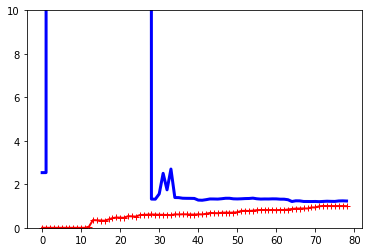

21


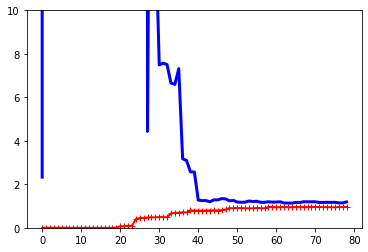

31


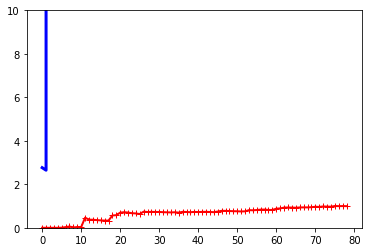

41


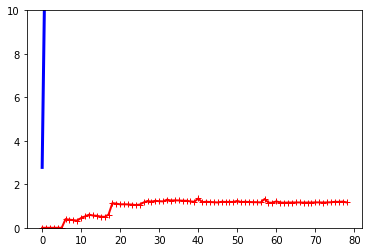

51


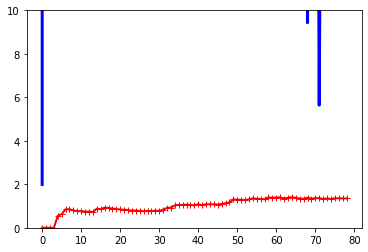

61


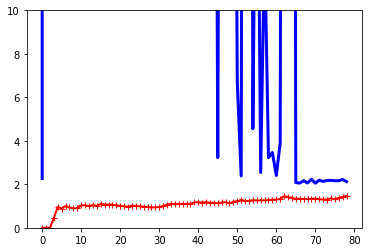

71


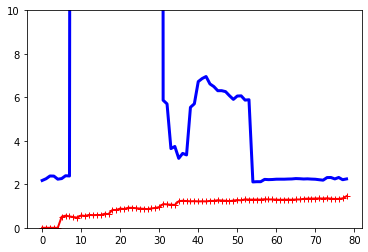

81


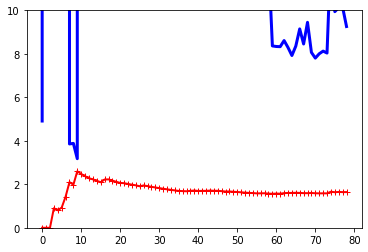

91


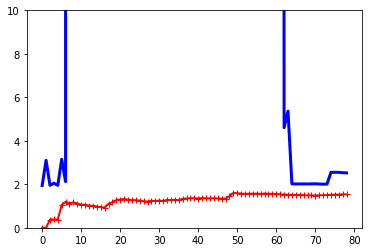

101


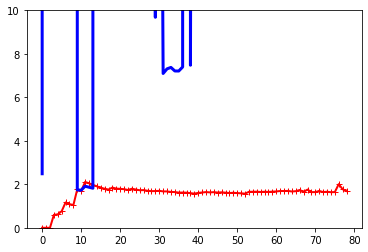

In [42]:
from sklearn.pipeline import Pipeline

for degree in range(1,110,10):
    print(degree)
    polynomial_regression = Pipeline([('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
                                      ('lin_reg', LinearRegression())])
    plot_learning_curvers(polynomial_regression, X, y)
    plt.ylim(0,10)
    plt.show()

In [43]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.42113548]])

In [44]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.39856322])

In [45]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.36764989])

In [46]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.3780125])

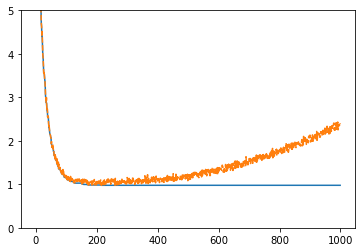

In [54]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
poly_scaler = Pipeline([('poly_features', PolynomialFeatures(degree=90, include_bias=False)), ('std_scaler', StandardScaler())])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None

error_plot = []
best_error = []

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)
    best_error.append(minimum_val_error)
    error_plot.append(val_error)

plt.plot(range(1000), best_error)
plt.plot(range(1000), error_plot,'--')
plt.ylim([0,5])
plt.show()

In [58]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [62]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [56]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

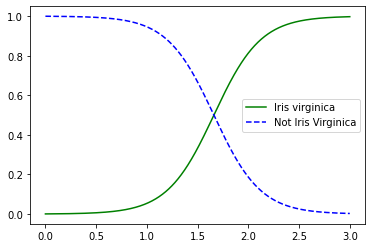

In [63]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not Iris Virginica')
plt.legend()
plt.show()

In [64]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [66]:
X = iris['data'][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [67]:
softmax_reg.predict([[5,2]])

array([2])

In [68]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])